## Desafío - Boosting Classifiers



<br>
<div class="alert alert-block alert-success">

<b>Nombre:</b> Moises Quiroz Diaz.

<b>Generación:</b> 3.

<b>Profesor:</b> Gabriel Tamayo L.

</div>

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.


### Descripción
* Para esta sesión trabajaremos con una base de datos sobre rotación de clientes en una compañia de telecomunicaciones. El archivo contiene 3333 registros y 20 atributos. El vector objetivo a modelar es la tasa de rotación entre los clientes de una compañia de telecomunicaciones churn. Los atributos existentes hacen referencia a características de la cuenta de cada cliente. Lista de atributos:
    * State: Estado de Estados Unidos
    * Account Length: Tiempo en que la cuenta ha sido activada
    * Area Code: código de área.
    * international plan: Plan internacional activiado
    * voice mail plan: Plan de mensajes de voz activado
    * number_vmail_messages: Cantidad de mensajes de voz.
    * total_day_minutes: Cantidad de minutos ocupados en la mañana.
    * total_day_calls: Cantidad de llamadas realizadas en la mañana.
    * total_day_charge: Cobros realizados en la mañana.
    * total_eve_minutes: Cantidad de minutos ocupados en la tarde.
    * total_eve_calls: Cantidad de llamadas realizadas en la tarde.
    * total_eve_charge: Cobros realizados en la tarde.
    * total_night_calls: Cantidad de llamadas realizadas en la noche.
    * tota_night_minutes: Cantidad de minutos ocupados en la noche.
    * total_night_charge: Cobros realizados en la noche.
    * total_intl_minutes: Cantidad de minutos ocupados en llamadas internacionales.
    * total_intl_calls: Cantidad de llamadas internacionales realizadas.
    * total_intl_charge: Cobros realizados por llamadas internacionales.
    * churn: 1 si el cliente se cambió de compañia, 0 de los contrario.

Los datos provienen del paquete AppliedPreditiveModeling de R .

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [60]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

### Ejercicio 1: Preprocesamiento

* Grafique el comportamiento distributivo de los atributos y de la variable dependiente. Reporte brevemente el comportamiento de las variables.
* Para las variables categóricas, recodifíquelas en variables binarias.

In [4]:
df = pd.read_csv('churn_train.csv').drop(columns=['Unnamed: 0'])
df.sample()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
650,NY,140,area_code_415,no,no,0,235.5,81,40.04,257.2,130,21.86,103.1,111,4.64,11.5,4,3.11,2,no


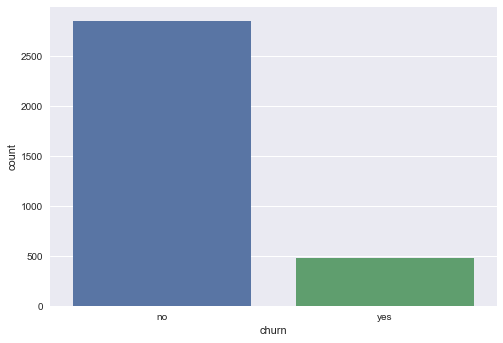

In [33]:
sns.countplot(df.churn)

state


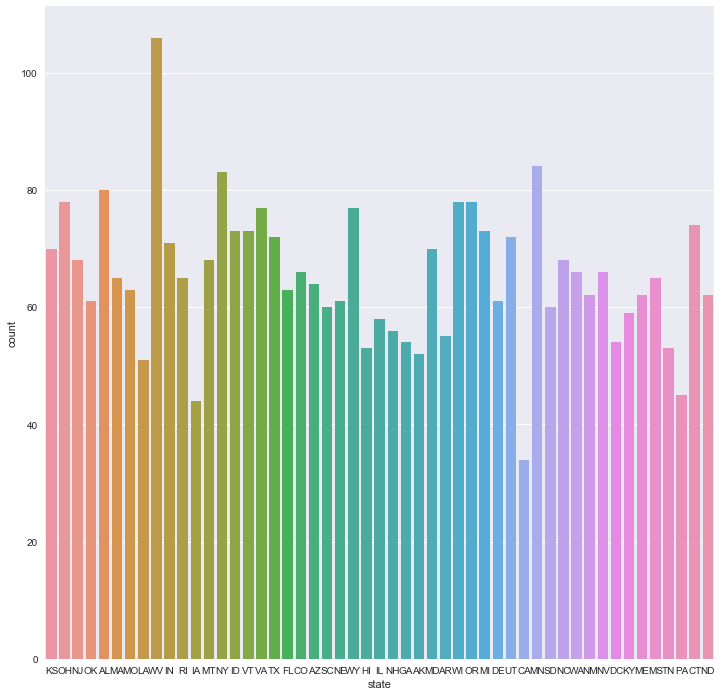

account_length


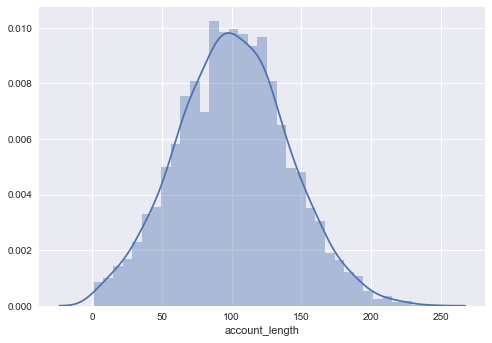

area_code


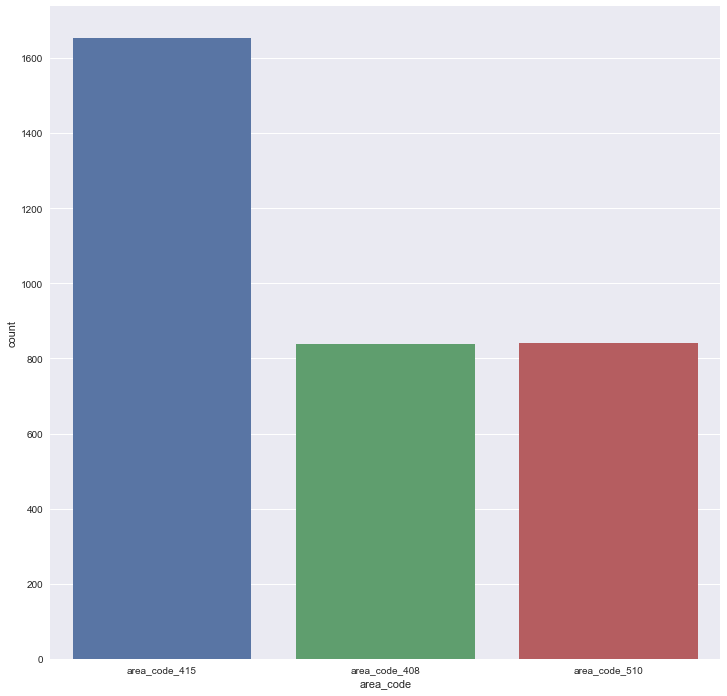

international_plan


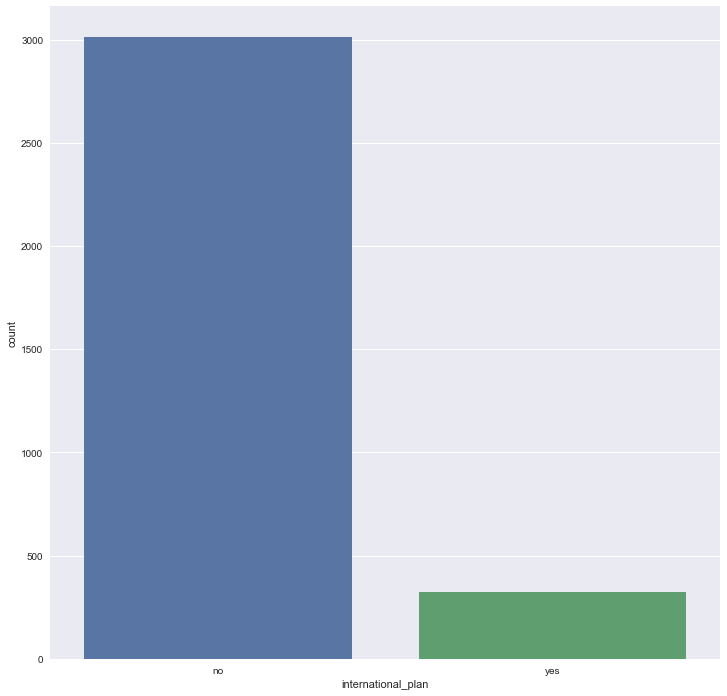

voice_mail_plan


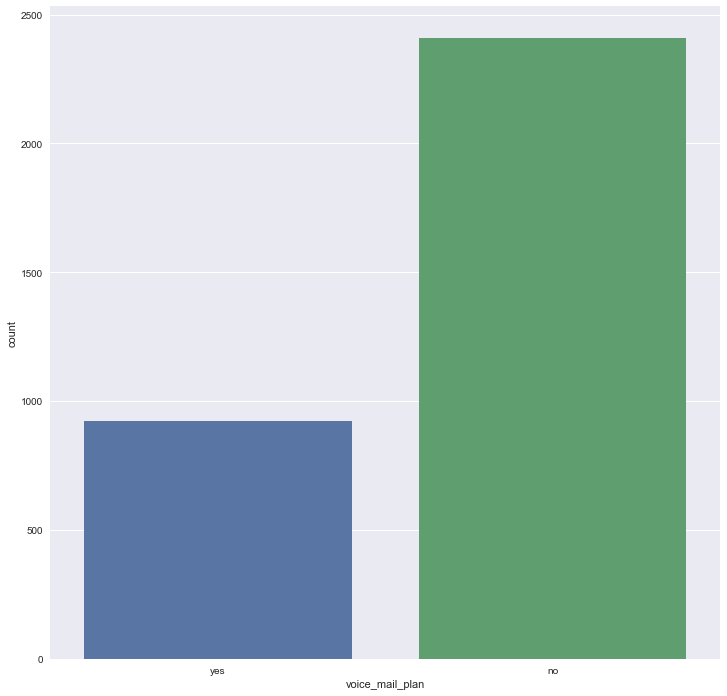

number_vmail_messages


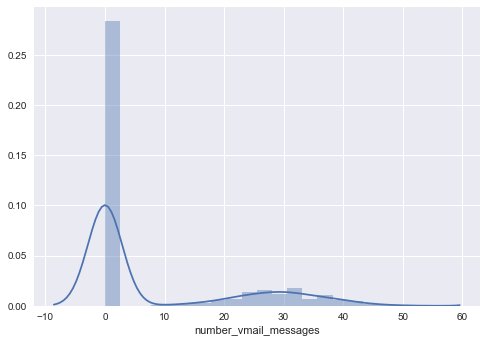

total_day_minutes


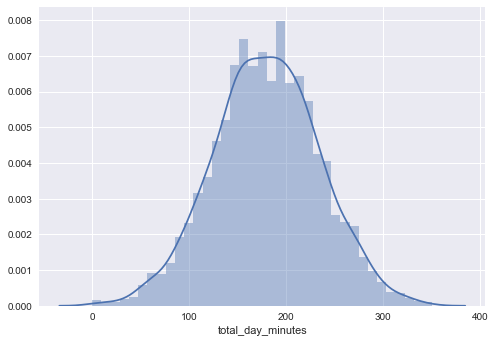

total_day_calls


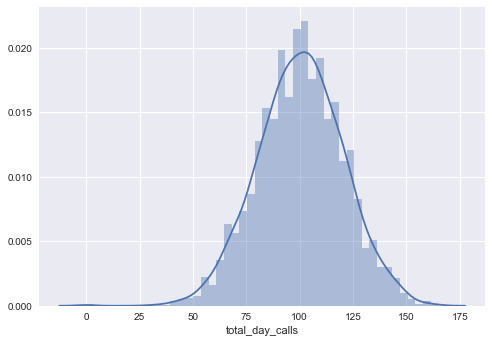

total_day_charge


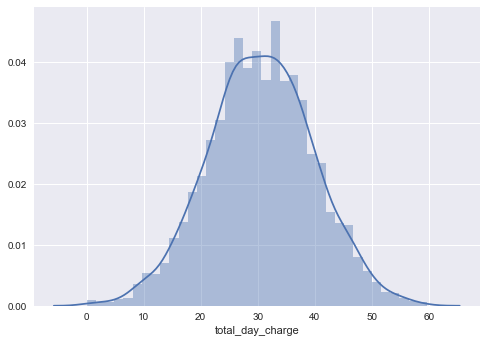

total_eve_minutes


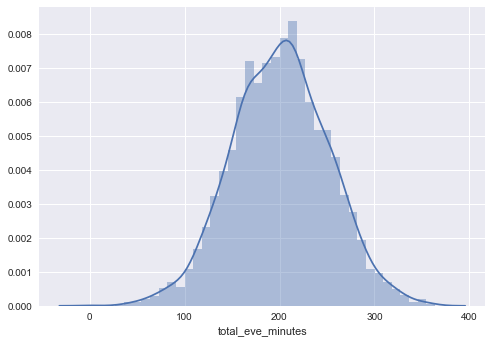

total_eve_calls


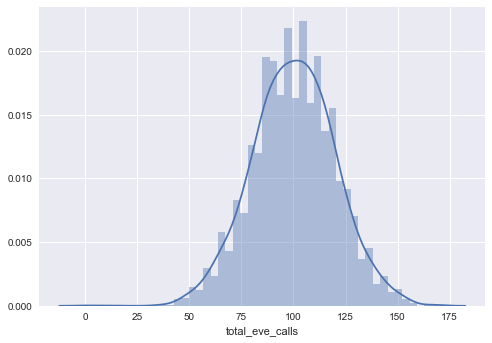

total_eve_charge


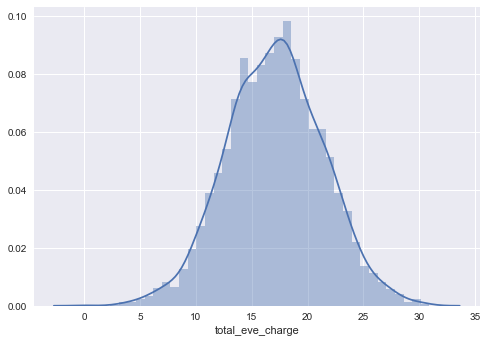

total_night_minutes


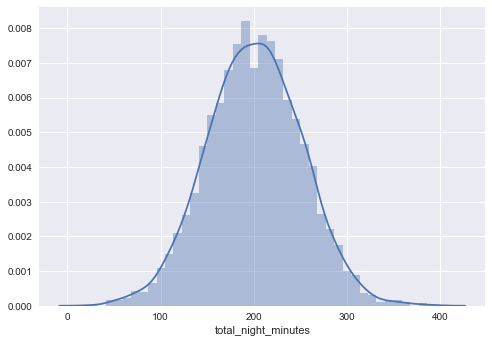

total_night_calls


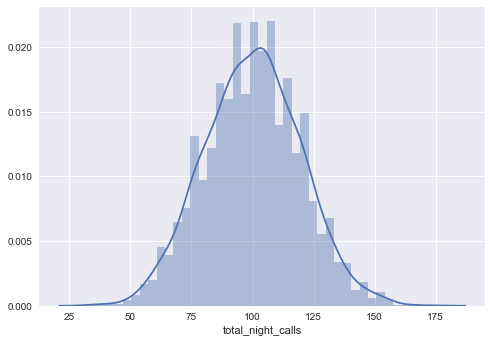

total_night_charge


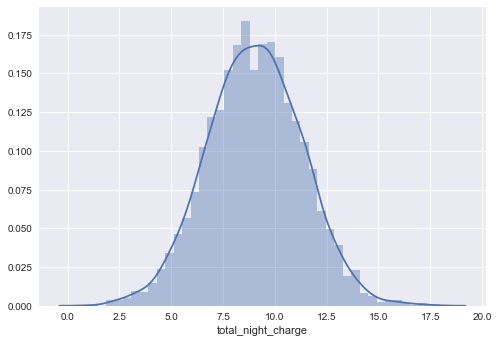

total_intl_minutes


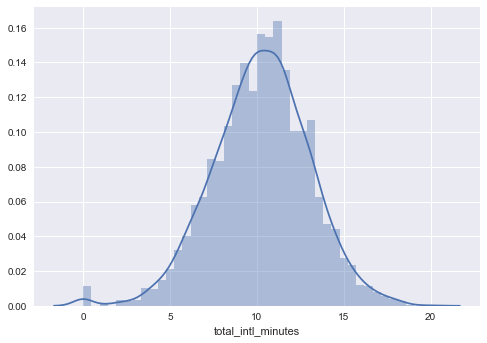

total_intl_calls


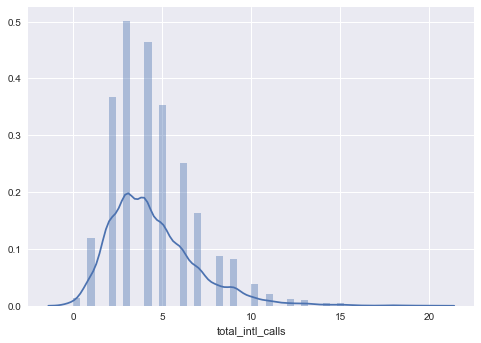

total_intl_charge


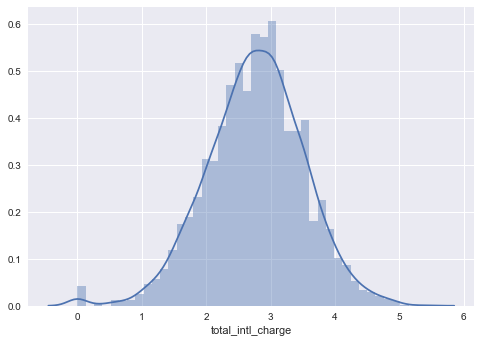

number_customer_service_calls


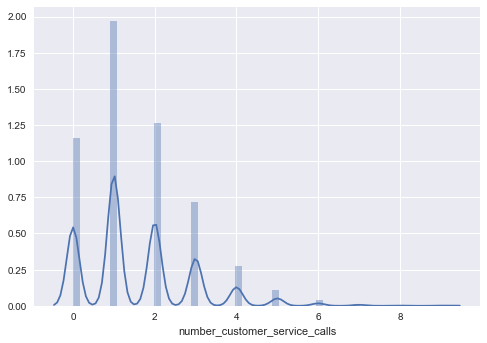

In [32]:
for nombre,serie in df.drop(columns=['churn']).iteritems():
    if np.dtype(serie)=='object':
        print(nombre)
        plt.figure(figsize=(12,12))
        sns.countplot(serie)
        plt.show()
    else:
        print(nombre)
        sns.distplot(serie)
        plt.show()

Se observa que en la mayoria se asocia al 'no' en el vector objetivo, para las demas variables en su mayoria asemejan un comportamiento normal, exeptuando number_vmail_messages que presenta un desequilibrio entre los atributos

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

In [36]:
df_n = pd.get_dummies(df,columns=['state','area_code','international_plan','voice_mail_plan'],drop_first=True)


In [37]:
df_n.sample()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,...,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_area_code_415,area_code_area_code_510,international_plan_yes,voice_mail_plan_yes
1265,95,39,260.8,130,44.34,213.4,111,18.14,195.6,97,...,0,0,0,0,0,1,1,0,0,1


### Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

* Entrene los clasificadores AdaBoost y Gradient Boosting, para mejorar su capacidad predictiva implemente una búsqueda de grilla con las siguientes especificaciones:

| Modelo   |      Grilla      |
|----------|:-------------:|
| AdaBoostClassifier |  {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]} |  
| GradientBoostingClassifier |    {'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]}   |   
 


* Si el tiempo de computación es alto, puede implementar la búsqueda con 1 validación cruzada.
* Reporte las métricas para los mejores modelos.

In [41]:
X = df_n.drop(columns='churn')
Y = df_n['churn']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=.33,random_state=11238)

In [67]:
parameter_Ada = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]}
cl_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=parameter_Ada, n_jobs=-1,cv=2)

parameter_Gradient={'learning_rate': [0.01, 0.1,0.5],'n_estimators': [50, 100, 500, 1000, 2000],'subsample': [0.1,0.5,0.9]}

In [44]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [72]:
cl_ada = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=parameter_Ada, n_jobs=-1,cv=6)
cl_Gradient = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=parameter_Gradient, n_jobs=-1,cv=6)

In [63]:
cl_ada.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [50, 100, 500, 1000, 2000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
print(classification_report(y_test,cl_ada.predict(X_test)))

              precision    recall  f1-score   support

          no       0.90      0.97      0.93       938
         yes       0.67      0.38      0.48       162

    accuracy                           0.88      1100
   macro avg       0.79      0.67      0.71      1100
weighted avg       0.87      0.88      0.87      1100



In [73]:
cl_Gradient.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [74]:
cl_Gradient.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000, 'subsample': 0.9}

In [75]:
print(classification_report(y_test,cl_Gradient.predict(X_test)))

              precision    recall  f1-score   support

          no       0.96      0.99      0.97       938
         yes       0.90      0.77      0.83       162

    accuracy                           0.95      1100
   macro avg       0.93      0.88      0.90      1100
weighted avg       0.95      0.95      0.95      1100



### Ejercicio 3: Principales factores asociados

* Con el mejor modelo, reporte la importancia relativa de los atributos y comente cuáles son los que aumentan la probabilidad de fuga en los clientes.

<div class="alert alert-block alert-warning">
<b>Tips:</b> 
    
   - Pueden implementar la función plot_importance que se encuentra en la lectura de Bagging y Random Forest.

</div>


In [76]:
def plot_feature_importance(fit_model, feat_names):
    tmp_importance = fit_model.feature_importances_
    sort_importance = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importance]
    plt.barh(
        range(len(feat_names)), tmp_importance[sort_importance]
    )
    plt.yticks(range(len(feat_names)),
               names, rotation=0)

In [79]:
Gradiente= cl_Gradient.best_estimator_

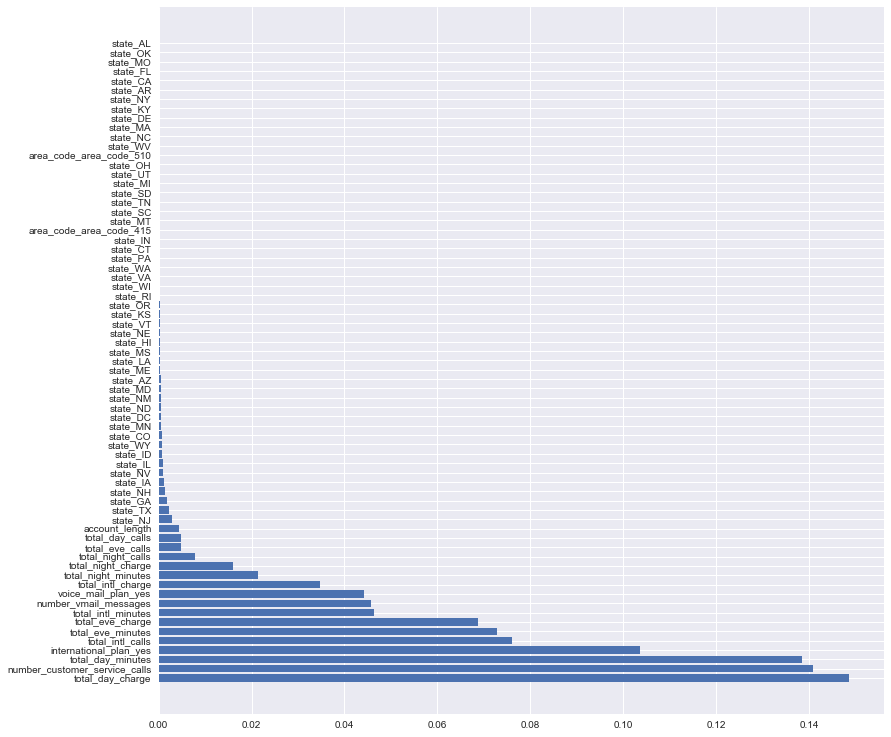

In [84]:
plt.figure(figsize=(13,13))
plot_feature_importance(Gradiente,X.columns)

Los mejores corresponden a:
    
    total_day_charge
    number_customer_service_calls
    total_day_minutes
    international_plan_yes
    total_intl_calls

### Ejercicio 4: Probabilidad de fuga
* El gerente general necesita saber en qué estados hay una mayor probabilidad de fuga de clientes. Para ello, identifique los tres estados con una mayor probabilidad de fuga.
* Implemente el modelo predictivo con el archivo churn_test.csv .
* Recuerde que para obtener la probabilidad de clase, debe utilizar la función predict_proba del modelo.

In [85]:
df_test = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')
df_test.sample()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
421,DE,102,area_code_408,no,no,0,245.4,82,41.72,260.3,124,22.13,195.1,82,8.78,10.5,3,2.84,3,yes


In [105]:
df_n = pd.get_dummies(df_test,columns=['state','area_code','international_plan','voice_mail_plan'],drop_first=True)

In [113]:
Gradiente.predict_proba(df_n.drop(columns='churn'))[:,1]

array([0.0210388 , 0.03169986, 0.15819548, ..., 0.0444905 , 0.02053176,
       0.02011493])

In [108]:
prueba = {'Estado':df_test['state'],'Proba':pd.Series(Gradiente.predict_proba(df_n.drop(columns='churn'))[:,1])}

In [114]:
prueba = pd.DataFrame.from_dict(prueba).sort_values(by='Proba',ascending=False)

Los estados en orden de probabilidad de cambiar son:

In [127]:
prueba.groupby(['Estado']).mean().sort_values(by=['Proba'],ascending=False)

,Proba
Estado,
NJ,0.276340
OK,0.248959
NM,0.211771
KS,0.190857
TX,0.183165
TN,0.182828
CA,0.179639
OR,0.172291
WA,0.171627
